In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

### Explore the Database

In [5]:
# Use Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# Use `engine.execute` to select and display the first 2 rows from each table
engine.execute('SELECT * FROM measurement LIMIT 2').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0)]

In [9]:
# Use `engine.execute` to select and display the first 2 rows from each table
engine.execute('SELECT * FROM station LIMIT 2').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)]

In [10]:
# reflect an existing database into a new model
# Reflect Database into ORM class
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [11]:
# View all of the classes that automap found (should be the same as what was listed by inspect)
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the Measurement table.
maxdate = session.query(func.max(Measurement.date)).all() 

print(f"The most recent date is {maxdate[0][0]}")

The most recent date is 2017-08-23


The most recent date is 2017-08-23
1 year earlier than the most recent date is: 2016-08-23 00:00:00

 Line plot for Precipitation by Date 
 



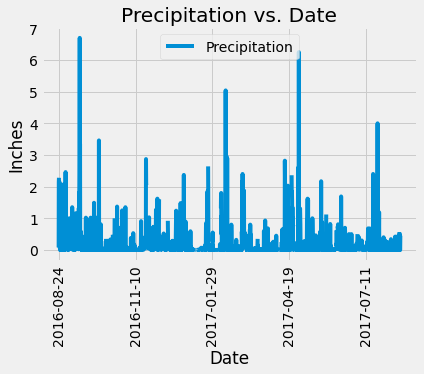

In [80]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Find the most recent date in the Measurement table.
# note: the most recent data was found above....and is in maxdate

print(f"The most recent date is {maxdate[0][0]}")

# Calculate the date one year from the last date in data set.
# convert the string to a datetime obj

date_time_obj = dt.datetime.strptime(maxdate[0][0],'%Y-%m-%d')

# Calculate the predecing year before the max date as the starting point...so minus 366
year_earlier = date_time_obj - dt.timedelta(days=366) 
print("The starting date for full year of data preceding last date is:", year_earlier)

# Perform a query to retrieve the data and precipitation scores

plot_precip_list = session.query(Measurement.date, Measurement.prcp.label("Precipitation")).\
    filter(Measurement.date >= year_earlier).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
plot_precip_df =pd.DataFrame(plot_precip_list).set_index("date").sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data

Line_Chart = plot_precip_df.plot(y="Precipitation",title="Precipitation vs. Date")
Line_Chart.set_ylabel("Inches")
Line_Chart.set_xlabel("Date")
Line_Chart.tick_params(axis='x', labelrotation=90)

print(f"\n Line plot for Precipitation by Date \n \n")
plt.show()


In [81]:
# Use Pandas to calculate the summary statistics for the precipitation data
plot_precip_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [82]:
# Close Session
session.close()